In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import os
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
#data loader class
class CsvLoader:
    def __init__(self,path,filename):
        self.path = os.path.join(path,filename)

    def load_csv(self):
        df = pd.read_csv(self.path,engine='python',error_bad_lines=False)
        return df


In [5]:
csv_loader = CsvLoader('../Db_files','processed_tweet_data.csv')
csv_loaded = csv_loader.load_csv()
csv_loaded[:10]

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,user_mentions
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Africa is ""in the midst of a full-blown third ...",1.666667e-01,0.188889,en,548.0,612.0,ketuesriche,551,351,"['TelGlobalHealth', 'WHOAFRO']"
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,195.0,92.0,Grid1949,66,92,['globalhlthtwit']
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you research2note for creating this amaz...,3.166667e-01,0.483333,en,2.0,1.0,LeeTomlinson8,1195,1176,"['NHSRDForum', 'Research2note', 'NHSRDForum']"
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",8.611111e-02,0.197222,en,1580.0,899.0,RIPNY08,2666,2704,['HighWireTalk']
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think its important that we dont sell COVAX ...,2.800000e-01,0.620000,en,72.0,20.0,pash22,28250,30819,['PeterHotez']
5,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",Im pleased to welcome the WeCanDoThis bus to A...,5.083333e-01,0.783333,en,683.0,220.0,SandhraLee,759,4163,['CDCDirector']
6,2021-06-18 17:56:44+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,347.0,neilwalton48,221,599,['RealJoelSmalley']
7,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageous...,3.700743e-17,0.633333,en,536.0,348.0,Candide62,154,1102,['RealJoelSmalley']
8,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,0.455556,en,197.0,93.0,AnneCar51323293,115,2030,['globalhlthtwit']
9,2021-06-18 17:56:47+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",It is really something to see new research com...,3.727273e-01,0.467424,en,3.0,1.0,DarkaDuna2014,94,144,['LongCovidNYC']


#Data Understanding

In [6]:
class DataInfo:
    def __init__(self,df):
        self.df = df

    def general_info(self):
        return self.df.info()

    def general_description(self):
        return self.df.describe()

    def count_null(self):
        return self.df.isnull().sum()
  
  

In [7]:
Get_Info = DataInfo(csv_loaded)
print(Get_Info.general_info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       3720 non-null   object 
 1   source           3720 non-null   object 
 2   original_text    3720 non-null   object 
 3   polarity         3720 non-null   float64
 4   subjectivity     3720 non-null   float64
 5   lang             3720 non-null   object 
 6   favorite_count   3720 non-null   float64
 7   retweet_count    3720 non-null   float64
 8   original_author  3720 non-null   object 
 9   followers_count  3720 non-null   int64  
 10  friends_count    3720 non-null   int64  
 11  user_mentions    3720 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 348.9+ KB
None


Data Visualization

In [8]:
class data_visualization:
    def __init__(self,df):
        self.df = df

    def pie_chart(self):
        score_col = pd.Series(self.df['score'].value_counts(), index=['positive','negative','neutral'], name="score")
        score_col.plot.pie(figsize=(6, 6));

    def bar_chart(self):
        score_col = pd.Series(self.df['score'].value_counts(), index=['positive','negative','neutral'], name="score")
        score_col.plot.bar(figsize=(6, 6));

#Data Cleaning

In [9]:
import pandas as pd


class Clean_Tweets:
    """
    The PEP8 Standard AMAZING!!!
    """
    def __init__(self, df:pd.DataFrame):
        self.df = df
        print('Automation in Action...!!!')

    def drop_duplicate(self)->pd.DataFrame:
        """
        drop duplicate rows
        """        
        return self.df.drop_duplicates()

    def convert_to_datetime(self,df)->pd.DataFrame:
        """
        convert column to datetime
        """
        df['created_at'] = pd.to_datetime(self.df['created_at'])
        return df
    
    def convert_to_numbers(self, df:pd.DataFrame)->pd.DataFrame:
        """
        convert columns like polarity, subjectivity, retweet_count
        favorite_count etc to numbers
        """
        df['polarity'] = pd.to_numeric(self.df['polarity'])
        df['subjectivity'] = pd.to_numeric(self.df['subjectivity'])
        df['retweet_count'] = pd.to_numeric(self.df['retweet_count'])
        df['favorite_count'] = pd.to_numeric(self.df['favorite_count'])
        df['followers_count'] = pd.to_numeric(self.df['followers_count'])
        return df

    def drop_null_col(self, df:pd.DataFrame)->pd.DataFrame:
        # removed columns containing null values of more than 20%
        row,col = df.shape
        df.dropna(axis='columns',thresh=row*0.8,inplace=True)
        return df
        

    def special_chars(self,x):
        special_characters = '@_!#$%^&*()<>?/\|}{~:;[]'
        for char in special_characters:
            x = x.replace(char, '')
        x = x.encode('ascii', 'ignore').decode('ascii')
        return x

    def filter_text(self,df:pd.DataFrame) ->pd.DataFrame:
        df['clean_text'] = self.df['original_text'].apply(lambda x: self.special_chars(x))
        # print(df['original_text'])
        return df

    def clean_dataframe(self):
        df_duplicatedropped = self.drop_duplicate()
        df_datetime = self.convert_to_datetime(df_duplicatedropped)
        df_numb =  self.convert_to_numbers(df_datetime)
        df_nulldroped = self.drop_null_col(df_numb)
        df_cleaned = self.filter_text(df_nulldroped)
        return df_cleaned
    

In [10]:
cleanData = Clean_Tweets(csv_loaded).clean_dataframe()
cleanData.columns

Automation in Action...!!!


Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'user_mentions', 'clean_text'],
      dtype='object')

#Data Preparation

In [11]:
class Prepare_data_sent_analysis:
    def __init__(self,df):
        self.df = df

    def text_category(self,p)-> str:
        if p > 0 :
            return 'positive'
        elif p < 0 :
            return 'negative'
        else:
            return 'neutral'
  
  
    def preprocess_data(self):
        df = self.df[self.df['lang'] =="en"]
        df['score'] = df['polarity'].apply(lambda row: self.text_category(row))
        df.drop(df[df['score'] =='neutral'].index, inplace = True)
        df=df.reset_index(drop=True)
        return df

    def prepare_features(self):
        df_sent_analysis = self.preprocess_data()
        score_series = df_sent_analysis['score'].map({'positive':1, 'negative':0})
        text_series = df_sent_analysis['clean_text']
        X = text_series.tolist()
        y = score_series.tolist()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)  
        return X_train, X_test, y_train, y_test

    def vectorize_features(self):
        X_train, X_test, y_train, y_test = self.prepare_features()
        trigram_vect = CountVectorizer(ngram_range=(3, 3))
        trigram_vect.fit(X_train)
        X_train_trigram = trigram_vect.transform(X_train)
        X_test_trigram = trigram_vect.transform(X_test)
        return X_train_trigram,X_test_trigram,y_train, y_test,trigram_vect



In [12]:
X_train_trigram,X_test_trigram,y_train, y_test,trigram_vect = Prepare_data_sent_analysis(cleanData).vectorize_features()

#Modelling


In [13]:
class Modeling:
    def __init__(self,X_train,X_test,y_train,y_test,trigram_vect):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.trigram_vect = trigram_vect

    def model(self):
        clf = SGDClassifier()
        clf.fit(self.X_train, y_train)
        return clf

    def predict(self,x_test = None):
        sgd_model = self.model()
        if x_test is None:
            return sgd_model.predict(self.X_test)
        else:
            x_vect = self.trigram_vect.transform(x_test)
            return sgd_model.predict(x_vect)

    def display_info_model(self):
        print(self.model().show_topics(formatted=False))

    def score(self):
        train_score = clf.score(self.predict(self.X_train), self.y_train)
        test_score = clf.score(self.predict(self.X_test), self.y_test)
        print("Train score: "+str(round(train_score, 2))+" ; Validation score: "+str(round(test_score, 2)))

    def precision_recall(self):
        precision = precision_score(self.y_test, self.predict(), average='weighted')
        recall = recall_score(self.y_test, self.predict(), average='weighted')
        print(f'The precision score is {precision} and the recall score is {recall}')

  


In [14]:
model_output = Modeling(X_train_trigram,X_test_trigram,y_train, y_test,trigram_vect)
model_output.predict()[:100]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
model_output.precision_recall()

The precision score is 0.9719574630759971 and the recall score is 0.973919523099851


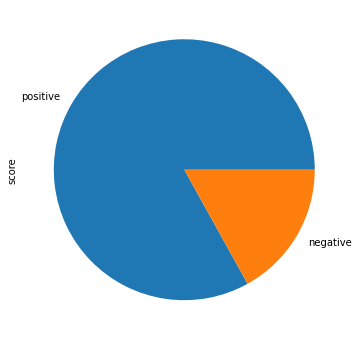

In [16]:
visualizer = data_visualization(Prepare_data_sent_analysis(cleanData).preprocess_data())
visualizer.pie_chart()

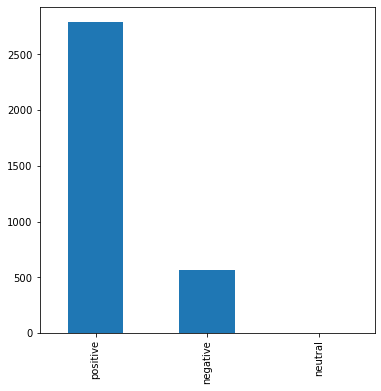

In [17]:
visualizer.bar_chart()